In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [ ]:
data = pd.read_csv('./data.csv')
data

,Title,Years,Certification,Runtime,Rating,Number of Votes,Emmys,Creators,Actors,Genres,Coutries of origins,Languages,Production companies,Link
0,Queen Cleopatra,"(2023, None)",TV-14,45.0,1.2,86000,0,NaN,"Jada Pinkett Smith, Adele James, Craig Russell...","Documentary, Drama, History",United Kingdom,English,Nutopia,https://www.imdb.com/title/tt27528139/?ref_=sr...
1,Velma,"(2023, 2024)",TV-MA,25.0,1.6,80000,0,Charlie Grandy,"Mindy Kaling, Glenn Howerton, Sam Richardson, ...","Animation, Adventure, Comedy, Crime, Horror, M...","United States, South Korea",English,"Charlie Grandy Productions, Kaling Internation...",https://www.imdb.com/title/tt14153790/?ref_=sr...
2,Keeping Up with the Kardashians,"(2007, 2021)",TV-14,44.0,2.9,32000,0,"Ryan Seacrest, Eliot Goldberg","Khloé Kardashian, Kim Kardashian, Kourtney Kar...","Family, Reality-TV",United States,"English, Spanish","Bunim-Murray Productions (BMP), Ryan Seacrest ...",https://www.imdb.com/title/tt1086761/?ref_=sr_...
3,Batwoman,"(2019, 2022)",TV-14,45.0,3.6,47000,0,Caroline Dries,"Camrus Johnson, Rachel Skarsten, Meagan Tandy,...","Action, Adventure, Crime, Drama, Sci-Fi",United States,English,"Berlanti Productions, DC Entertainment, Warner...",https://www.imdb.com/title/tt8712204/?ref_=sr_...
4,The Acolyte,"(2024, None)",TV-14,35.0,4.1,125000,0,Leslye Headland,"Lee Jung-jae, Amandla Stenberg, Manny Jacinto,...","Action, Adventure, Drama, Fantasy, Mystery, Sc...",United States,English,"Lucasfilm, Disney+, The Walt Disney Company",https://www.imdb.com/title/tt12262202/?ref_=sr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,The Wire,"(2002, 2008)",TV-MA,60.0,9.3,390000,0,David Simon,"Dominic West, Lance Reddick, Sonja Sohn, Wende...","Crime, Drama, Thriller",United States,"English, Greek, Mandarin, Spanish","Blown Deadline Productions, Home Box Office (HBO)",https://www.imdb.com/title/tt0306414/?ref_=sr_i_5
1134,Planet Earth,"(2006, None)",TV-PG,50.0,9.4,223000,4,NaN,"Sigourney Weaver, David Attenborough, Nikolay ...","Documentary, Family","United Kingdom, Canada, United States, Japan",English,"British Broadcasting Corporation (BBC), Canadi...",https://www.imdb.com/title/tt0795176/?ref_=sr_i_4
1135,Band of Brothers,"(2001, None)",TV-MA,60.0,9.4,544000,6,NaN,"Scott Grimes, Damian Lewis, Ron Livingston, Sh...","Drama, History, War","United Kingdom, United States","English, Dutch, French, German, Lithuanian","DreamWorks, DreamWorks Television, HBO Films",https://www.imdb.com/title/tt0185906/?ref_=sr_i_3
1136,Planet Earth II,"(2016, None)",TV-G,50.0,9.5,162000,2,NaN,"David Attenborough, Michael J. Sanderson, Gord...",Documentary,"United Kingdom, Germany, France, China, United...","English, French","BBC Natural History Unit (NHU), BBC America, Z...",https://www.imdb.com/title/tt5491994/?ref_=sr_i_2


# Mean of each column

- Title: title of the show
- Years: year of broadcast of the show
- Certification: certification that the show has
- Runtime: Time limited of the show
- Rating: the score on 10 point scale
- Number of Votes: express vote of the show
- Emmys: the show has how much emmy prize
- Creators: The people or group people make the show
- Actor: The people join the show
- Genres: type of the show
- Countries of origins: the country originate the show
- Language: the language of the show
- Production Companies: the company produce the show
- Link: link of the show

# Check datatype of columns

In [7]:
data.dtypes

Title                    object
Years                    object
Certification            object
Runtime                  object
Rating                  float64
Number of Votes          object
Emmys                     int64
Creators                 object
Actors                   object
Genres                   object
Coutries of origins      object
Languages                object
Production companies     object
Link                     object
dtype: object

## See that we need to adjust the data type of some columns:  
### - Runtime  
### - Number of Votes  
### - Years

# Shape of data

In [8]:
# Size of data set
data.shape

(1138, 14)

So, the dataset with 1138 rows and 14 columns meets the requirements.

# Check duplicate

In [9]:
data[data.duplicated(keep=False)]

,Title,Years,Certification,Runtime,Rating,Number of Votes,Emmys,Creators,Actors,Genres,Coutries of origins,Languages,Production companies,Link


The data in this dataset does not contain any rows that are entirely identical. This means that each row in the dataset is unique, with no duplication of all values across all columns between any two rows. This characteristic ensures that every record holds independent information and is not repeated, making data analysis more accurate and reliable

# Blank shell of each columns

In [10]:
data.isna().sum()

Title                     0
Years                     0
Certification            14
Runtime                  57
Rating                    0
Number of Votes           0
Emmys                     0
Creators                198
Actors                    1
Genres                    0
Coutries of origins       0
Languages                 0
Production companies     17
Link                      0
dtype: int64

The **Runtime** and **Creators** columns have quite a few missing values (NAN). However, the **Creators** column is not a critical factor that we need to focus on, so it can be ignored. Meanwhile, the **Runtime** column plays a more important role, and we will spend time handling this column in more detail in the subsequent steps.

# Change data in column Runtime about minute unit

Based on the data, we can easily observe that the **Runtime** column is divided into time units as follows: **h** represents hours, **m** represents minutes, and some values contain both **h** and **m**.

For the values in the **Runtime** column, we will process them as follows:

- **Case with both "h" and "m"**: Use the `split` function to separate the value into two parts based on the "h" character. The part before "h" will be converted to a number and multiplied by 60 (to convert to minutes), then added to the second part (the number of minutes).  
- **Case with only "h"**: Extract the part before "h," convert it to a number, and multiply it by 60.  
- **Case with only "m"**: Simply take the number of minutes from the value.  

This approach ensures that all values in the **Runtime** column are uniformly converted to minutes.

In [11]:
new_col = []  
for val in data['Runtime']:
    if isinstance(val, str):
        if 'h' in val and 'm' in val: # Case have hour and minute
            hour, min = val.split('h')
            min = min.split('m')[0]
            new_col.append(int(hour) * 60 + int(min))
        elif 'h' in val:  # Case only hour
            hour = val.split('h')[0]
            new_col.append(int(hour) * 60)
        elif 'm' in val:  # Case only minute
            min = val.split('m')[0]
            new_col.append(int(min))
        elif pd.isna(val):
            new_col.append(0)
    else:
        new_col.append(val)  #if val is not str then append the list

data['Runtime'] = new_col
# Convert the 'Runtime' column to integer type, filling any remaining NaN with 0 first
data['Runtime'] = data['Runtime'].fillna(0).astype('float')
print(data['Runtime'])

0       45.0
1       25.0
2       44.0
3       45.0
4       35.0
        ... 
1133    60.0
1134    50.0
1135    60.0
1136    50.0
1137    45.0
Name: Runtime, Length: 1138, dtype: float64


# Change data in column Number of Votes

In the dataset, we notice that some values in the column are formatted as numbers with the **K** (thousand) or **M** (million) suffixes. To process these, we need to convert the values into standard numerical format as follows:

- **If the value contains the "K" suffix**: Extract the number before the **K**, convert it to a numeric type, and then multiply by \( 10^3 \).  
- **If the value contains the "M" suffix**: Extract the number before the **M**, convert it to a numeric type, and then multiply by \( 10^6 \).  
- **If the value has no suffix**: Retain the value as it is.  

By doing this, we can standardize all the values in the column to a consistent numeric format.

In [12]:
new_col = []
for i in data['Number of Votes']:
    if 'K' in i:
        val = i.split('K')[0]
        new_col.append(int(float(val)*(10**3)))
    elif 'M' in i: 
        val = i.split('M')[0]
        new_col.append(int(float(val)*(10**6)))
data['Number of Votes'] = new_col
data['Number of Votes']

0         86000
1         80000
2         32000
3         47000
4        125000
         ...   
1133     390000
1134     223000
1135     544000
1136     162000
1137    2200000
Name: Number of Votes, Length: 1138, dtype: int64

# Handle Year column

To process the **Year** column with the format **2023–2024** (where the "–" is a special character different from the hyphen "-"), we will follow these steps:

1. **Replace the "–" character**: First, we need to replace the "–" with a regular hyphen "-" (which is easier to handle in Python) to ensure that all values can be easily split.

2. **Split the value into two parts**: After replacing the "–" character, if the **Year** column contains two years (e.g., "2023-2024"), we will split the value into two parts:
   - The first year (the start year of the release).
   - The second year (the end year of the release).
   These two years will be converted into a tuple in the form of (start_year, end_year).

3. **Handle cases with only one year**: If there is only one year (e.g., "2023"), we will assign that year to both the start and end years, and convert it into a tuple in the form of (year, year).

This approach ensures that the **Year** column is consistently converted into a tuple format, regardless of whether it represents a single year or a range of years.

In [13]:
def process_years(years):
    # Replace the special character '–' with '-'
    years = years.replace('–', '-')
    
    # Split the string by '-' and process the parts
    parts = years.split('-')
    year_start = int(parts[0]) if parts[0].isdigit() else None
    year_end = int(parts[1]) if len(parts) > 1 and parts[1].isdigit() else None
    
    return (year_start, year_end)


data['Years'] = data['Years'].apply(process_years)


print(data['Years'])

0       (2023, None)
1       (2023, 2024)
2       (2007, 2021)
3       (2019, 2022)
4       (2024, None)
            ...     
1133    (2002, 2008)
1134    (2006, None)
1135    (2001, None)
1136    (2016, None)
1137    (2008, 2013)
Name: Years, Length: 1138, dtype: object


We will use a boxplot to visualize the distribution of values in the dataset and identify outliers. A boxplot is a powerful tool that helps display the following characteristics of the data:

1. **Value Distribution**:  
   - The range of the data is represented through elements such as the median, interquartile range (IQR), and the minimum and maximum values within the non-outlier range.

2. **Outliers**:  
   - Values that fall outside the main data range (IQR) are shown as individual points, making it easy to identify and analyze them. 

This approach helps in understanding the overall data distribution and detecting anomalies effectively.

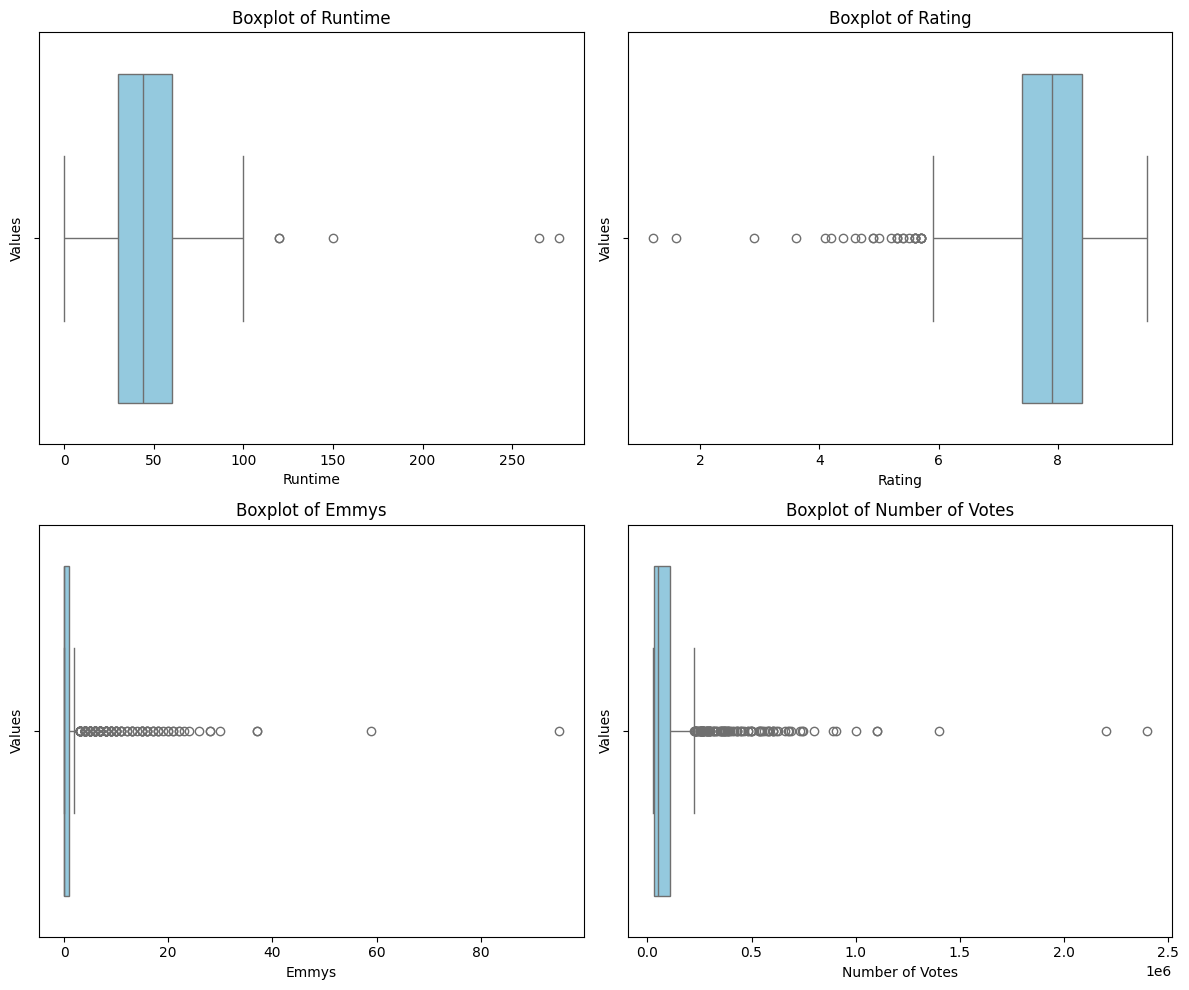

In [14]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

columns_to_plot = ['Runtime', 'Rating', 'Emmys', 'Number of Votes']

# Vẽ boxplot cho từng cột vào từng subplot
for i, column in enumerate(columns_to_plot):
    row = i // 2  
    col = i % 2   
    sns.boxplot(data=data, x=column, ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f"Boxplot of {column}")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Values")


plt.tight_layout()
plt.show()

We will fill the NaN values with 0 before handling outliers. This ensures that missing values do not interfere with the outlier detection process and helps maintain consistency in the data during analysis.

In [15]:
data[['Rating', 'Emmys', 'Number of Votes']] = data[['Rating', 'Emmys', 'Number of Votes']].fillna(0)

# Scale value of numeric columns

Column: Runtime
Min: 0.0, Max: 276.0, Median: 44.0, Mean: 42.60456942003515
----------------------------------------


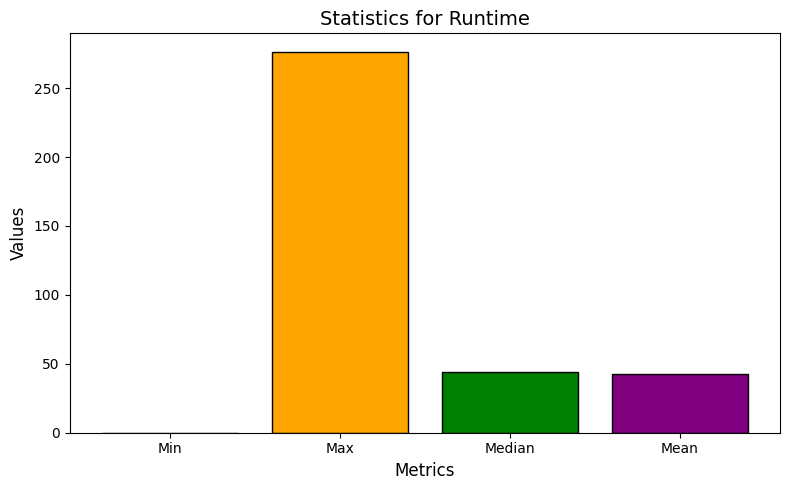

Column: Rating
Min: 1.2, Max: 9.5, Median: 7.9, Mean: 7.824077328646748
----------------------------------------


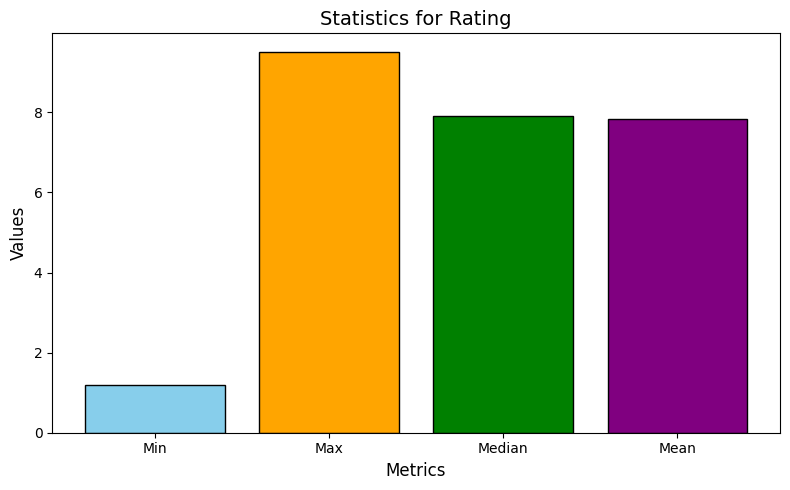

Column: Number of Votes
Min: 25000, Max: 2400000, Median: 53000.0, Mean: 105168.71704745168
----------------------------------------


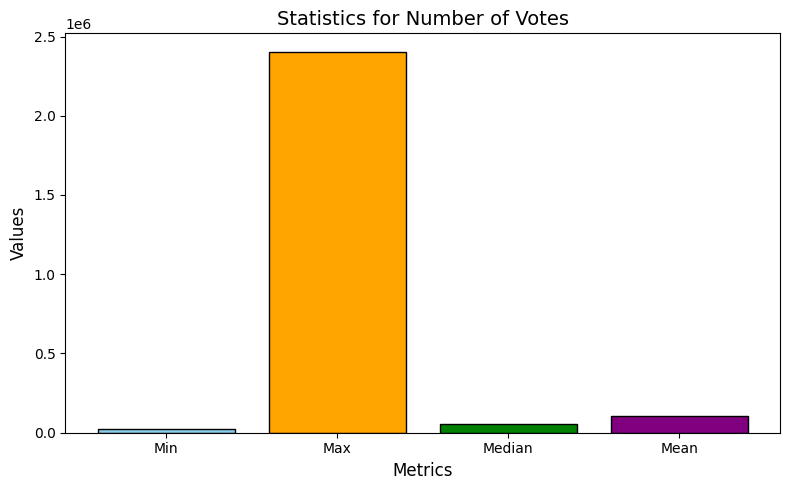

Column: Emmys
Min: 0, Max: 95, Median: 0.0, Mean: 1.578207381370826
----------------------------------------


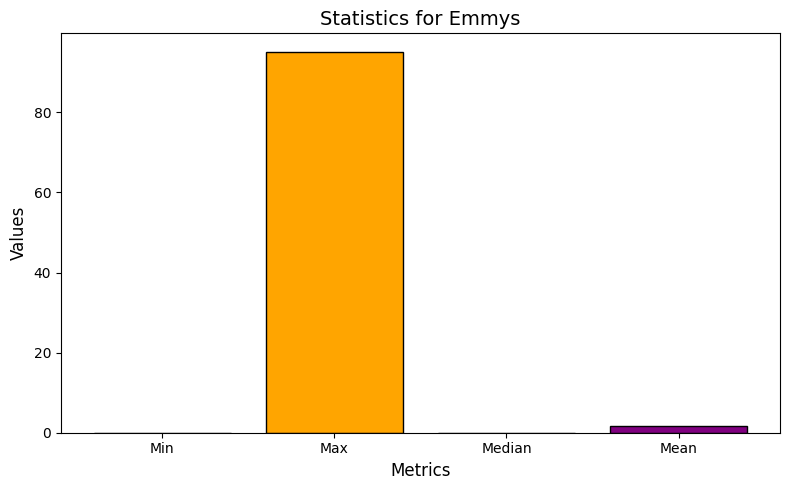

In [16]:

d = data[['Runtime', 'Rating', 'Number of Votes', 'Emmys']]

for column in d.columns:
    # Tính Min, Max, Median, và Mean
    min_val = d[column].min()
    max_val = d[column].max()
    median_val = d[column].median()
    mean_val = d[column].mean()

    
    print(f"Column: {column}")
    print(f"Min: {min_val}, Max: {max_val}, Median: {median_val}, Mean: {mean_val}")
    print("-" * 40)

    
    stats = {
        'Min': min_val,
        'Max': max_val,
        'Median': median_val,
        'Mean': mean_val
    }

    # Visualization
    plt.figure(figsize=(8, 5))
    plt.bar(stats.keys(), stats.values(), color=['skyblue', 'orange', 'green', 'purple'], edgecolor='black')
    plt.title(f'Statistics for {column}', fontsize=14)
    plt.xlabel('Metrics', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.tight_layout()

   
    plt.show()



# Save data

In [17]:
data.to_csv('data.csv', index=False)